### Data Exploration and Analysis Notebook

In [142]:
# Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.stats import chi2_contingency
from pandas.plotting import parallel_coordinates



In [143]:
# Import dataset and print out basic data

df = pd.read_csv("..\\data\\unclean\\car_dataset.csv", delimiter = ";")

print(df.describe(include='all'))
print(f"\nTotal Rows: {len(df)}")
print(f"\n{df.head(7)}")

graph_directory = "..\\graphs\\eda\\"

       buying maintenance doors persons luggage_boot safety class_values
count    1728        1728  1728    1728         1728   1728         1728
unique      4           4     4       3            3      3            4
top     vhigh       vhigh     2       2        small    low        unacc
freq      432         432   432     576          576    576         1210

Total Rows: 1728

  buying maintenance doors persons luggage_boot safety class_values
0  vhigh       vhigh     2       2        small    low        unacc
1  vhigh       vhigh     2       2        small    med        unacc
2  vhigh       vhigh     2       2        small   high        unacc
3  vhigh       vhigh     2       2          med    low        unacc
4  vhigh       vhigh     2       2          med    med        unacc
5  vhigh       vhigh     2       2          med   high        unacc
6  vhigh       vhigh     2       2          big    low        unacc


In [144]:
# Missing values
print("\nNumber of missing values in dataset:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique values for distinct column:")
for col in ['buying', 'maintenance', 'doors', 'persons', 'luggage_boot', 'safety', 'class_values']:
    print(f"{col} : {df[col].unique()}")


Number of missing values in dataset:
buying          0
maintenance     0
doors           0
persons         0
luggage_boot    0
safety          0
class_values    0
dtype: int64

Unique values for distinct column:
buying : ['vhigh' 'high' 'med' 'low']
maintenance : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
luggage_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
class_values : ['unacc' 'acc' 'vgood' 'good']


In [145]:
# Declare features and value order
features = ['buying', 'safety', 'doors', 'maintenance', 'luggage_boot', 'persons']
value_order = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'safety': ['low', 'med', 'high'],
    'doors': ['2', '3', '4', '5more'],
    'maintenance': ['low', 'med', 'high', 'vhigh'],
    'luggage_boot': ['small', 'med', 'big'],
    'persons': ['2', '4', 'more']
}

In [146]:
# Print value counts for all columns
output = "<table><tr>"

for column in df.columns:
    output += f"<th>{column}</th>"
output += "</tr><tr>"

for column in df.columns:
    value_counts = df[column].value_counts().to_frame()
    value_counts_html = value_counts.to_html(header=False, border=1, justify="left", max_rows=None)
    output += f"<td>{value_counts_html}</td>"
output += "</tr></table>"

HTML(output)


# Display full value counts for all columns
# for column in df.columns:
#     display(df[column].value_counts())

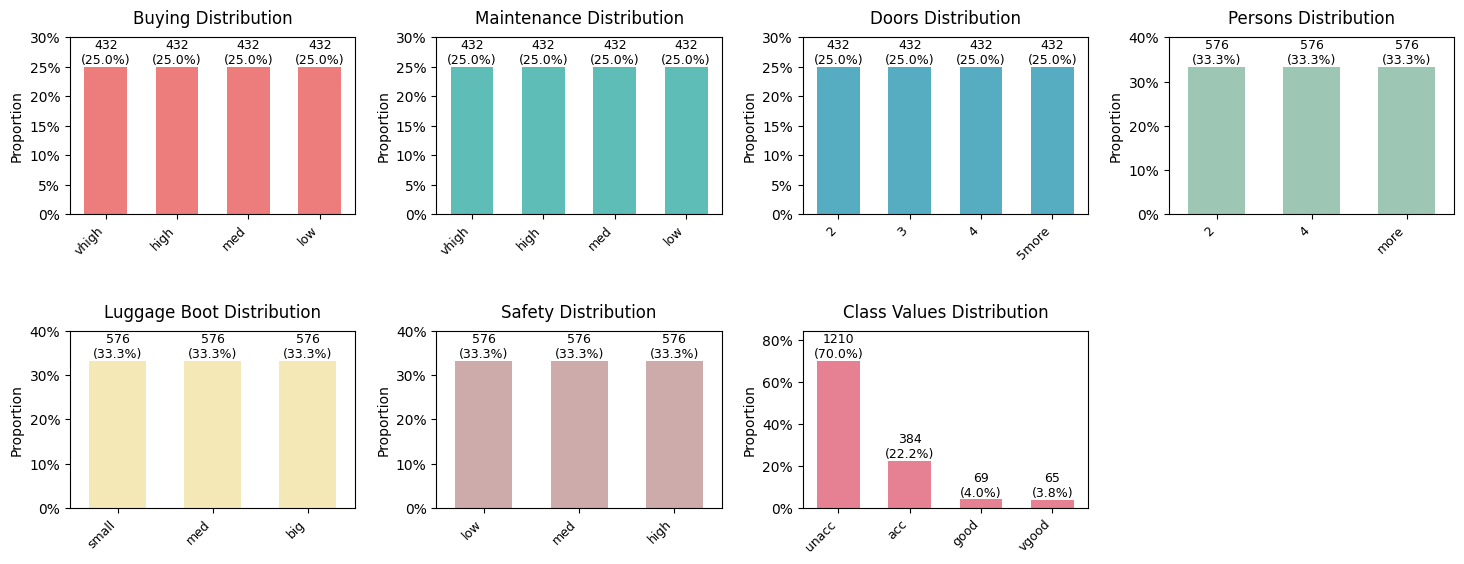

In [147]:
# Define colors for consistency
colors_array = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FFEEAD", "#D4A5A5"]

# Define number of columns and calculate rows
categorical_columns = df.columns.tolist()
n_cols = 4
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Create figure with adjusted size
plt.figure(figsize=(15, n_rows * 3))

# Create subplots for each variable
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Calculate proportions and counts
    value_counts = df[col].value_counts()
    proportions = df[col].value_counts(normalize=True)
    
    # Special handling for class_values column
    if col == 'class_values':
        sns.barplot(
            x=value_counts.index,
            y=proportions,
            width=0.6
        )
    else:
        sns.barplot(
            x=value_counts.index,
            y=proportions,
            color=colors_array[i % len(colors_array)],
            width=0.6
        )
    
    # Add count labels on top of each bar
    for j, (count, prop) in enumerate(zip(value_counts, proportions)):
        plt.text(j, prop, f'{count}\n({prop:.1%})', 
                ha='center', va='bottom', fontsize=9)
    
    # Adjust labels and titles
    plt.title(f'{col.replace("_", " ").title()} Distribution', fontsize=12, pad=10)
    plt.xlabel('')
    plt.ylabel('Proportion', fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
    max_y = proportions.max()
    plt.ylim(0, max_y * 1.2)

# Adjust layout to prevent overlap
plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=1.5)

# Save and show the plot
output = "values distribution graph"
plt.savefig(graph_directory + output)
plt.show()

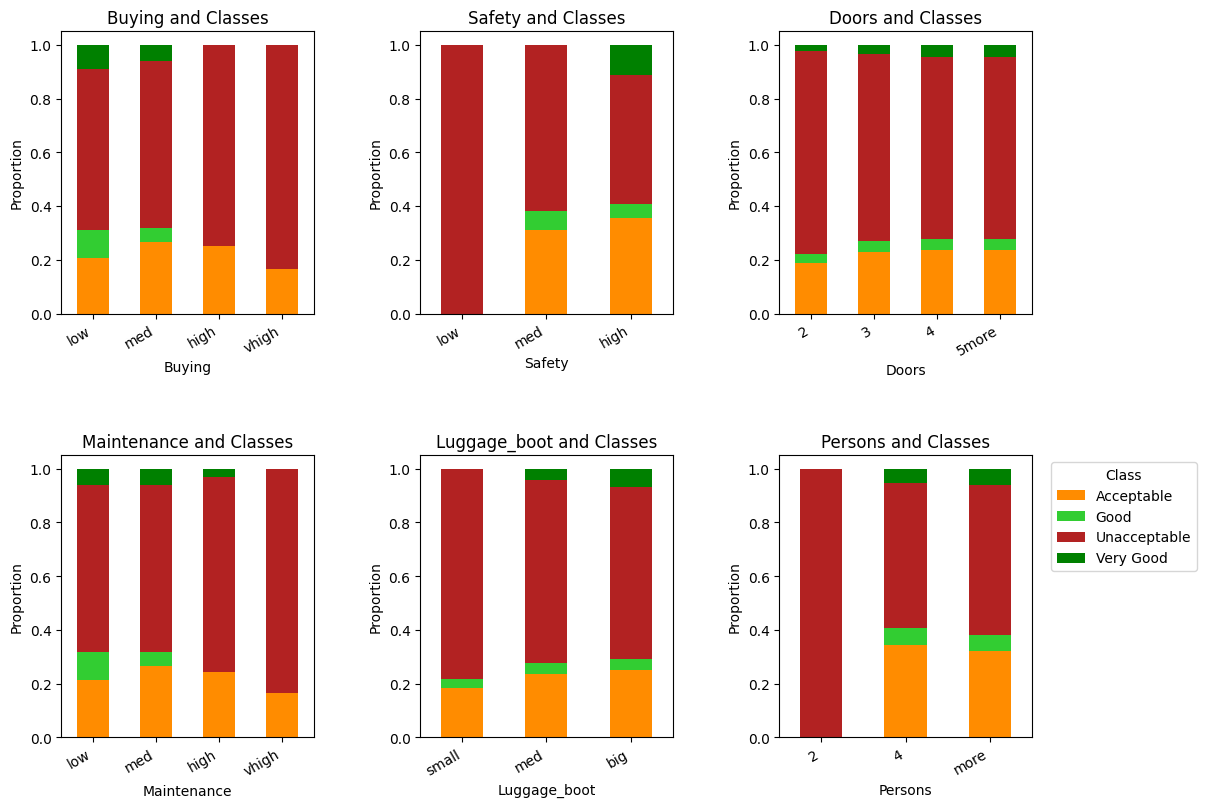

In [148]:
# Classes distribution on attribute values
class_colors = ['darkorange', 'limegreen', 'firebrick', 'green']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 9), constrained_layout=False)

axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    ordered_feature = pd.Categorical(
        df[feature], categories=value_order[feature], ordered=True
    )
    
    crosstab_data = pd.crosstab(ordered_feature, df['class_values'], normalize='index')
    
    crosstab_data.plot(
        kind = "bar", 
        stacked = True, 
        ax = ax, 
        color = class_colors,
        legend = False
    )
    ax.set_title(f'{feature.capitalize()} and Classes')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Proportion')
    
    ax.tick_params(axis='x', rotation=30)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

axes[-1].legend(
    title = "Class",
    labels = ["Acceptable", "Good", "Unacceptable", "Very Good"],
    bbox_to_anchor = (1.05, 1), 
    loc = 'upper left'
)

plt.tight_layout(pad=4)
output = "classes distribution graph by proportion"
plt.savefig(graph_directory + output)
plt.show()

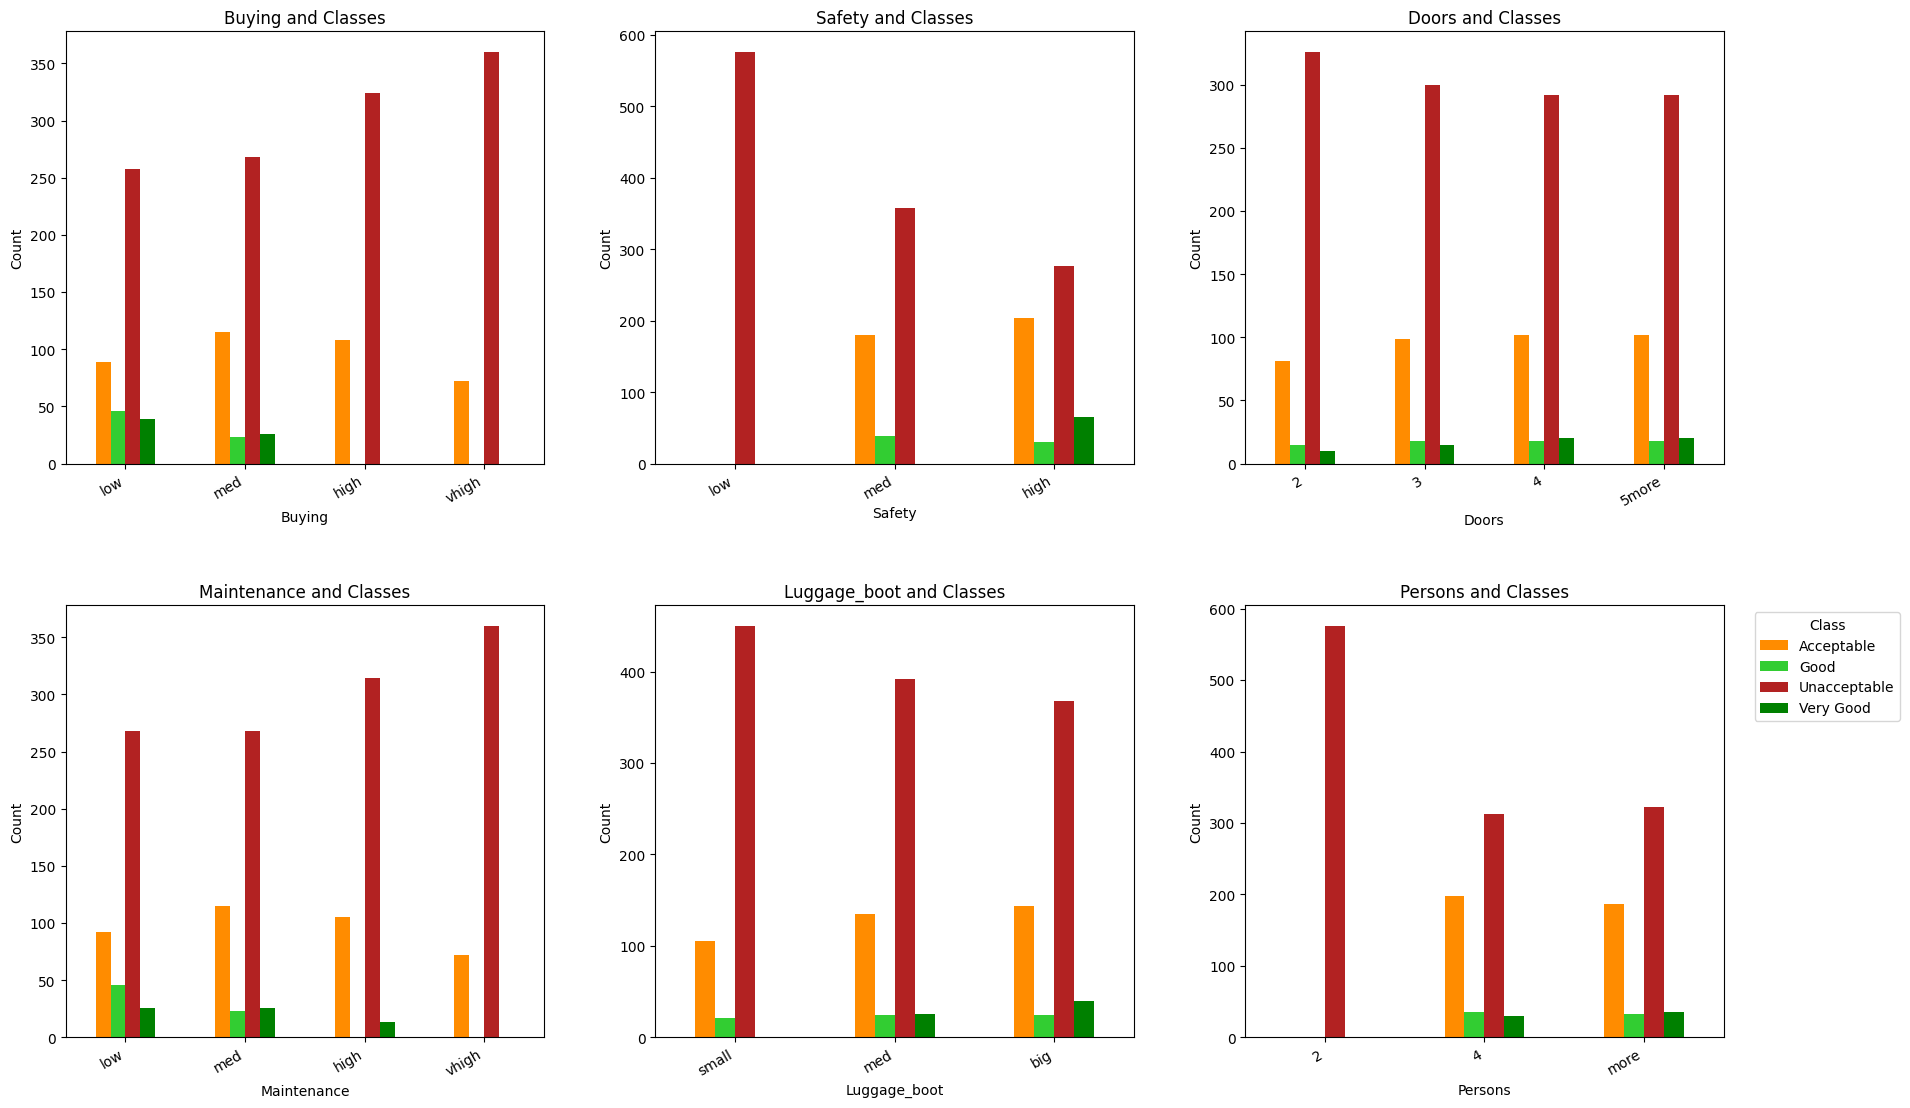

In [149]:

class_colors = ['darkorange', 'limegreen', 'firebrick', 'green']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), constrained_layout=False)

axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    
    ordered_feature = pd.Categorical(
        df[feature], categories=value_order[feature], ordered=True
    )
    
    # Crosstab without normalization
    crosstab_data = pd.crosstab(ordered_feature, df['class_values'])
    
    # Use grouped bar plot
    crosstab_data.plot(
        kind="bar", 
        stacked=False, 
        ax=ax, 
        color=class_colors,
        legend=False
    )
    ax.set_title(f'{feature.capitalize()} and Classes')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Count')  # Updated label to reflect count
    
    ax.tick_params(axis='x', rotation=30)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

# Add legend to the last subplot
axes[-1].legend(
    title="Class",
    labels=["Acceptable", "Good", "Unacceptable", "Very Good"],
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.tight_layout(pad=4)
output = "classes distribution by count"
plt.savefig(graph_directory + output)
plt.show()


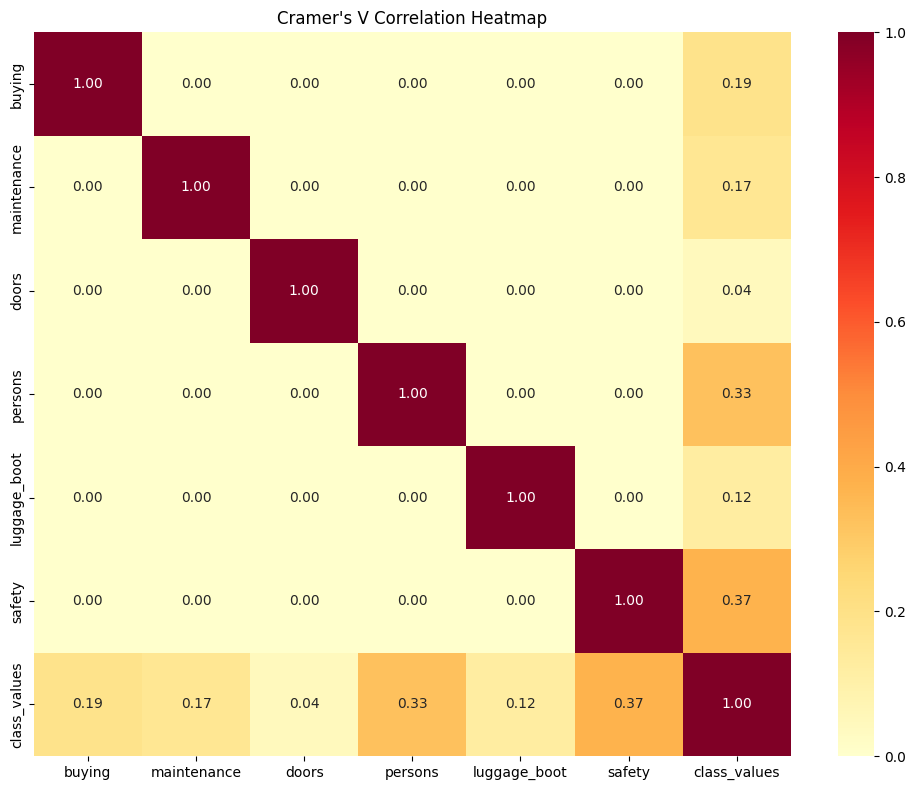


Top 5 strongest correlations:
            var1          var2  correlation
20        safety  class_values     0.372415
17       persons  class_values     0.327791
5         buying  class_values     0.191063
10   maintenance  class_values     0.166052
19  luggage_boot  class_values     0.124166


In [150]:
def cramers_v(x, y):
    """Calculate Cramer's V correlation between two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Get list of all categorical columns
categorical_columns = df.columns.tolist()

# Create correlation matrix using Cramer's V
n = len(categorical_columns)
cramer_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        cramer_matrix[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cramer_matrix,
    annot=True,
    cmap='YlOrRd',
    xticklabels=categorical_columns,
    yticklabels=categorical_columns,
    vmin=0,
    vmax=1,
    fmt='.2f'
)
plt.title("Cramer's V Correlation Heatmap")
plt.tight_layout()
output = "cramers correlation graph"
plt.savefig(graph_directory + output)
plt.show()

# Print strongest correlations
correlations = []
for i in range(n):
    for j in range(i+1, n):
        correlations.append({
            'var1': categorical_columns[i],
            'var2': categorical_columns[j],
            'correlation': cramer_matrix[i, j]
        })

correlations_df = pd.DataFrame(correlations)
print("\nTop 5 strongest correlations:")
print(correlations_df.sort_values('correlation', ascending=False).head())

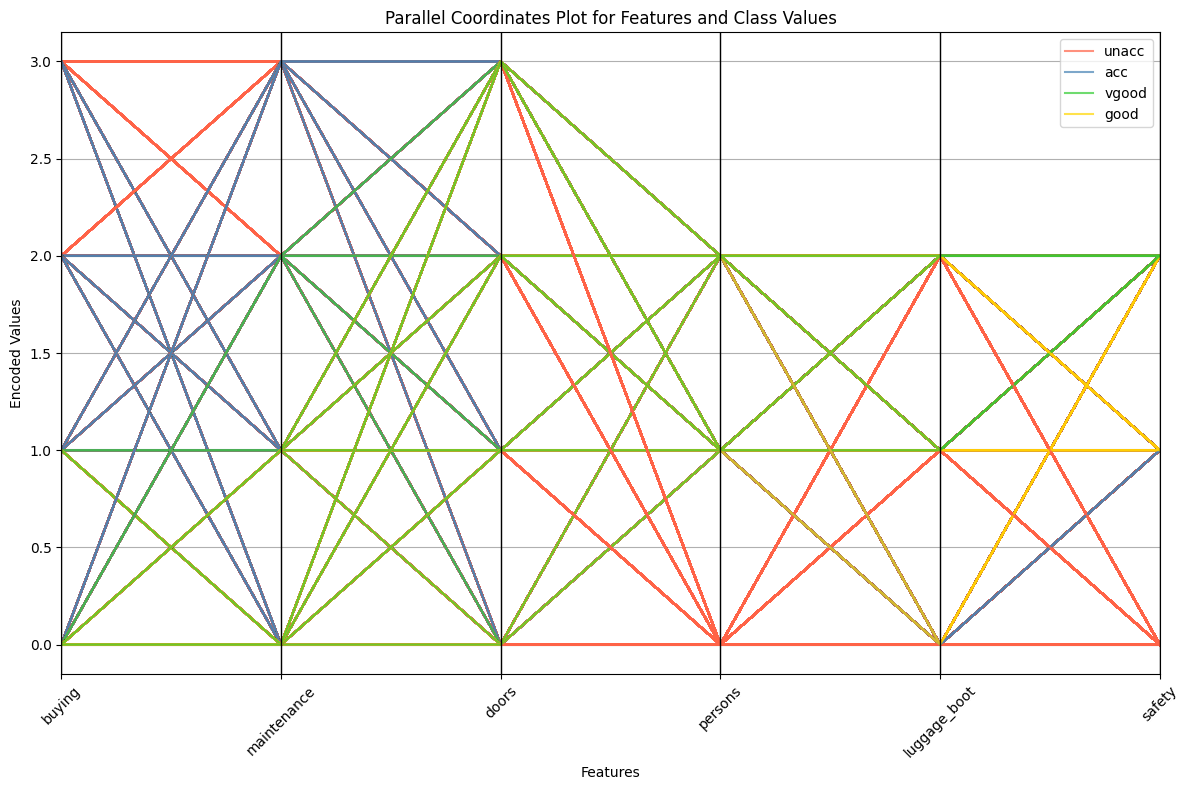

In [153]:
# Define custom color mapping for each class value
custom_colors = {
    'unacc': '#FF6347',
    'acc': '#4682B4',
    'vgood': '#32CD32',
    'good': '#FFD700'
}

# Convert the dataset to include encoded numerical mappings for the plot
df_numeric = df.copy()

# Apply ordinal encoding to all columns except 'class_values'
for column in df.columns:
    if column in value_order:  # Check if the column is in value_order
        df_numeric[column] = pd.Categorical(df[column], categories=value_order[column]).codes

# Add the class_values column back as a string for grouping in parallel coordinates
df_numeric['class_values'] = df['class_values']

# Map colors based on class values
color_palette = [custom_colors[val] for val in df_numeric['class_values'].unique()]

# Create the parallel coordinates plot using Matplotlib
plt.figure(figsize=(12, 8))
parallel_coordinates(
    df_numeric, 
    class_column='class_values', 
    color=color_palette, 
    alpha=0.7
)
plt.title("Parallel Coordinates Plot for Features and Class Values")
plt.xlabel("Features")
plt.ylabel("Encoded Values")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image
output_path = "parallel coordinates analysis"
plt.savefig(graph_directory + output_path, dpi=300)
plt.show()